**Gabriela Chimali Nava Ramírez | A01710530**

06/11/2025

In [8]:
import os
import zipfile
import pandas as pd
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Descarga de datos de Kaggle**



In [9]:
import kagglehub

path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cards-image-datasetclassification' dataset.
Path to dataset files: /kaggle/input/cards-image-datasetclassification


## **2. EDA**

In [ ]:
data_dir = "/kaggle/input/cards-image-datasetclassification/train"

if os.path.exists(data_dir):
    class_names = sorted(os.listdir(data_dir))
    print(f">> Clases encontradas: {class_names}")
    print(f"Número de clases: {len(class_names)}")

    data = []
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            img_size = None
            img_mode = None
            if count > 0:
                image_file = os.listdir(class_path)[0]
                img_path = os.path.join(class_path, image_file)
                try:
                    from PIL import Image
                    with Image.open(img_path) as img:
                        img_size = img.size
                        img_mode = img.mode
                except Exception as e:
                    print(f" *** ERROR al abrir la imagen {img_path}: {e}")
            data.append({'Clase': class_name, 'Cantidad': count, 'Tamaño': img_size, 'Modo': img_mode})
        else:
            print(f"  *** Directorio vacío: {class_path}")


    df_characteristics = pd.DataFrame(data)
    print("\n>> Características de las imágenes:")
    display(df_characteristics)

else:
    print(f" *** ERROR: Directorio no encontrado con el path: {data_dir}")
    class_names = []
    counts = {}

>> Clases encontradas: ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']
Número de clases: 

,Clase,Cantidad,Tamaño,Modo
0,ace of clubs,120,"(224, 224)",RGB
1,ace of diamonds,129,"(224, 224)",RGB
2,ace of hearts,171,"(224, 224)",RGB
3,ace of spades,181,"(224, 224)",RGB
4,eight of clubs,138,"(224, 224)",RGB
5,eight of diamonds,159,"(224, 224)",RGB
6,eight of hearts,152,"(224, 224)",RGB
7,eight of spades,135,"(224, 224)",RGB
8,five of clubs,150,"(224, 224)",RGB
9,five of diamonds,138,"(224, 224)",RGB


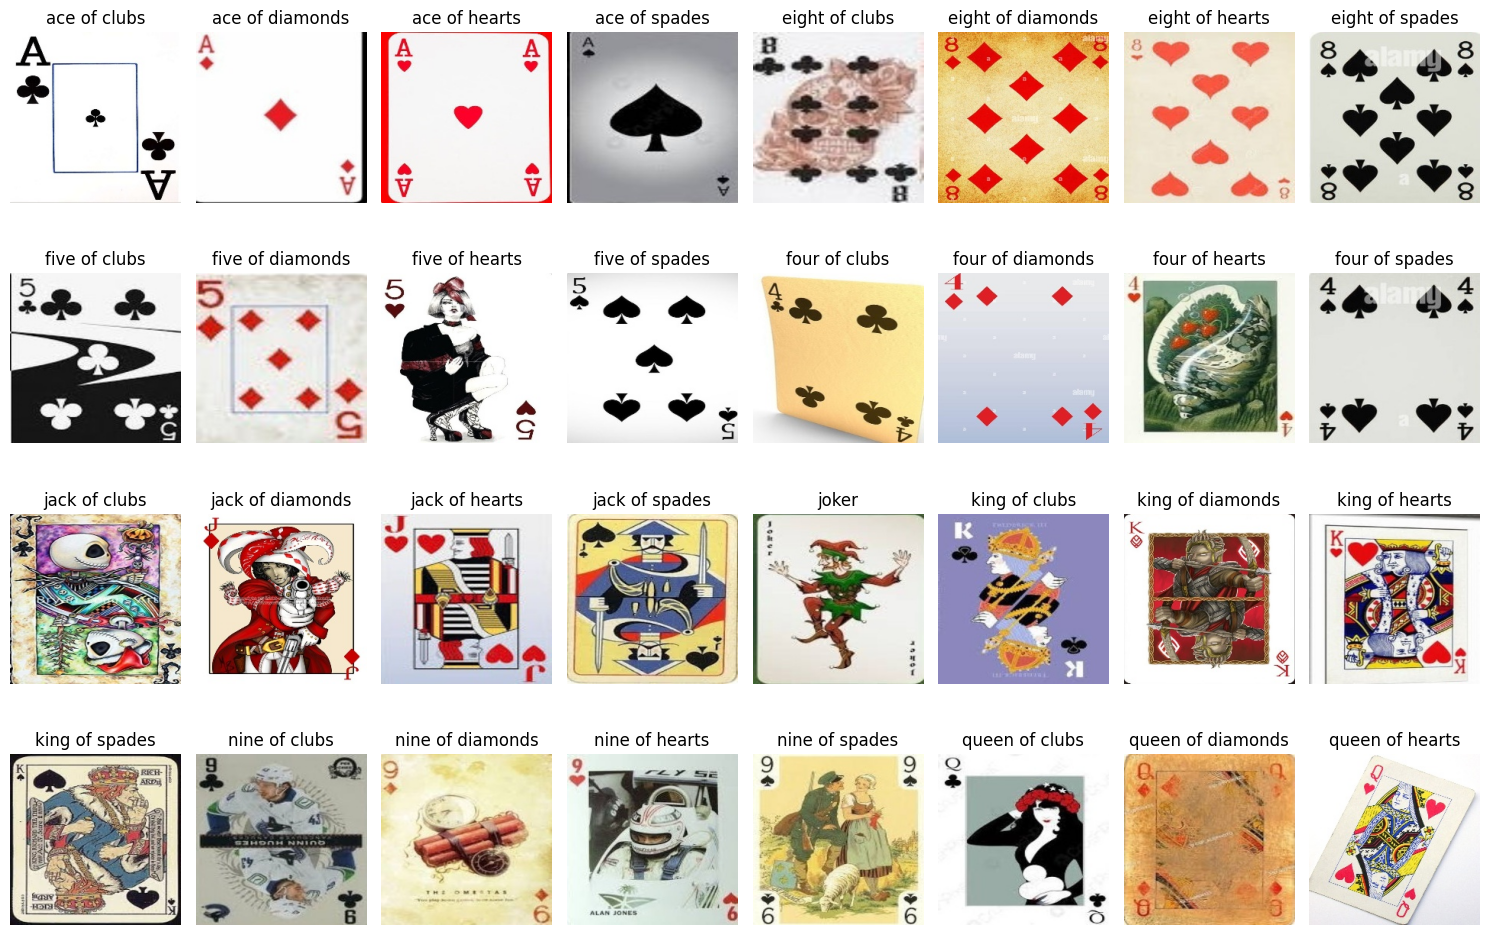

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Mostrar algunas imágenes de ejemplo
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names[:32]):
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    random_image = random.choice(image_files)
    img_path = os.path.join(class_path, random_image)

    plt.subplot(4, 8, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

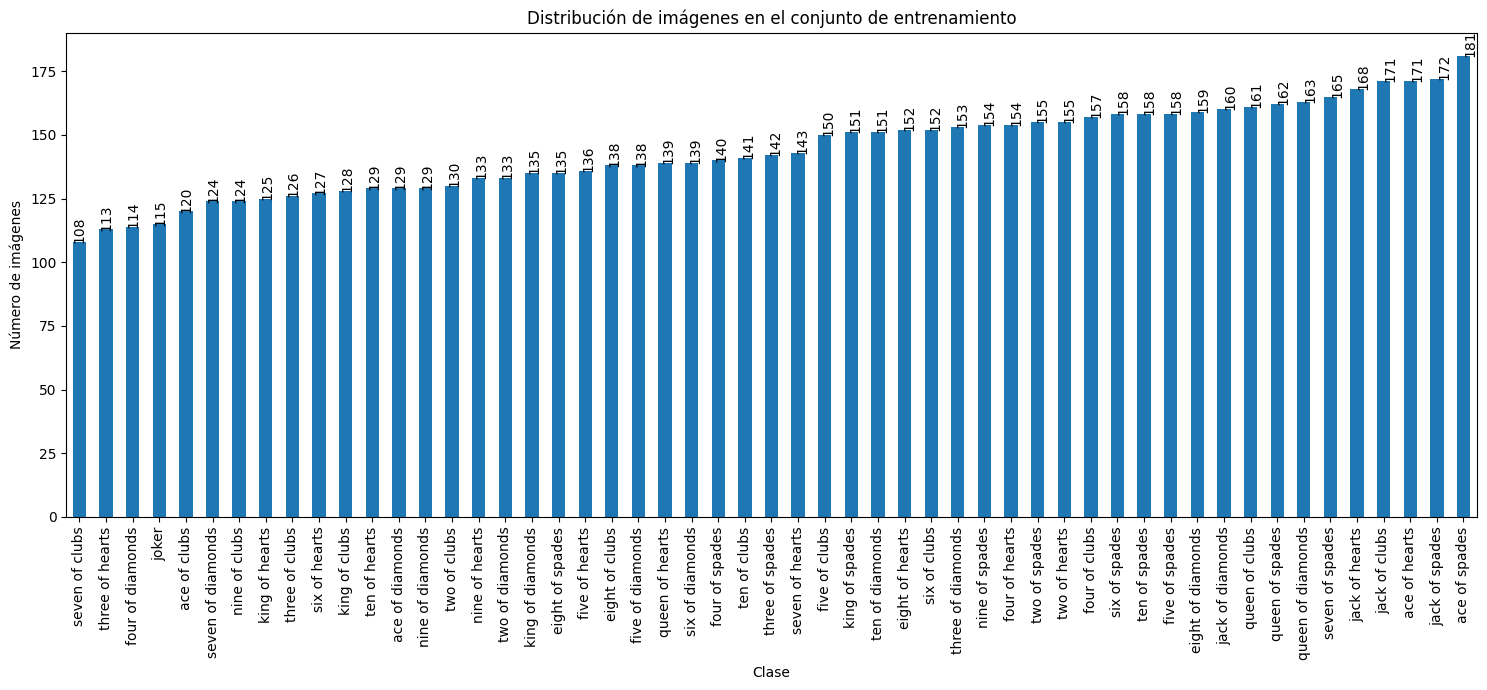

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Distribución de datos de entrenamiento
if 'counts' in locals():
    counts_series = pd.Series(counts).sort_values()
    plt.figure(figsize=(15, 7))
    ax = counts_series.plot(kind='bar')
    plt.title('Distribución de imágenes en el conjunto de entrenamiento')
    plt.xlabel('Clase')
    plt.ylabel('Número de imágenes')
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)


    plt.tight_layout()
    plt.show()
else:
    print("Training data counts not found. Please run the cell that calculates 'counts'.")